In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_friends = pd.read_csv("data/friends.csv")

In [3]:
df_friends.head(5)

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0
1,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,1,2,22,1994,James Burrows,7.9,7986,0
2,The One with the Thumb,Monica becomes irritated when everyone likes h...,1,3,22,1994,James Burrows,8.0,7632,0
3,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,1,4,22,1994,James Burrows,7.9,7302,0
4,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",1,5,22,1994,Pamela Fryman,8.3,7341,0


H1

In [34]:
df_friends[["duration_in_minutes", "total_votes"]]

,duration_in_minutes,total_votes
0,22,10266
1,22,7986
2,22,7632
3,22,7302
4,22,7341
...,...,...
229,22,4870
230,22,4854
231,22,4542
232,22,5201


In [35]:
df_friends["total_votes"].max()

np.int64(17032)

In [36]:
df_friends["total_votes"].min()

np.int64(4177)

In [39]:
df_friends.sort_values(["total_votes", "duration_in_minutes"], ascending=False)

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
233,The Last One,Phoebe races Ross to the airport in a bid to s...,10,17,45,2004,Kevin Bright,9.6,17032,1
110,The One Where Everybody Finds Out,When Phoebe finds out about Monica and Chandle...,5,14,22,1999,Michael Lembeck,9.7,13726,0
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0
84,The One with the Embryos,Phoebe's uterus is examined for implantation o...,4,12,22,1998,Kevin Bright,9.4,9678,0
37,The One with the Prom Video,The gang watches a home video from the night o...,2,14,22,1996,James Burrows,9.3,8808,0
...,...,...,...,...,...,...,...,...,...,...
213,The One with the Soap Opera Party,Joey throws a cast party on the roof of his bu...,9,20,22,2003,Sheldon Epps,8.1,4276,0
223,The One with the Home Study,Monica and Chandler nervously prepare for a vi...,10,7,22,2003,Kevin Bright,8.1,4270,0
212,The One with Rachel's Dream,"Nervous about his upcoming romantic scenes, Jo...",9,19,22,2003,Terry Hughes,7.9,4267,0
214,The One with the Fertility Test,Joey comes to Ross for advice on dating Charli...,9,21,22,2003,Gary Halvorson,8.1,4239,0


In [40]:
df_h1 = df_friends.groupby("duration_in_minutes").median("total_votes")
df_h1

,season,episode,year,rating,total_votes,special_episode
duration_in_minutes,,,,,,
22,5.0,12.0,1999.0,8.2,5110.0,0.0
23,9.0,18.0,2003.0,8.5,4607.0,0.0
24,9.0,14.0,2003.0,8.0,4331.0,0.0
26,9.0,17.0,2003.0,8.3,4501.0,0.0
27,9.0,16.0,2003.0,8.0,4177.0,0.0
30,6.0,23.5,2000.0,8.6,5293.0,1.0
45,10.0,17.0,2004.0,9.6,17032.0,1.0


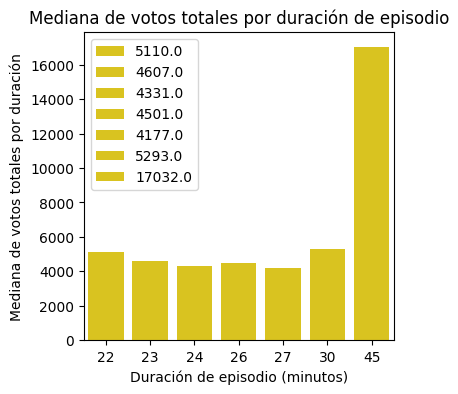

In [123]:
plt.figure(figsize=(4,4))
sns.barplot(data=df_h1, x=df_h1.index, y="total_votes", color="#F8DB01", label=df_h1["total_votes"])
plt.xlabel("Duración de episodio (minutos)")
plt.ylabel("Mediana de votos totales por duración")
plt.title("Mediana de votos totales por duración de episodio");

H2

In [53]:
df_friends.head(1)

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0


In [54]:
df_h2 = df_friends[["season", "episode", "rating"]]
df_h2.head(3)

,season,episode,rating
0,1,1,8.1
1,1,2,7.9
2,1,3,8.0


In [55]:
primero = df_h2.groupby("season").head(1)
primero

,season,episode,rating
0,1,1,8.1
24,2,1,8.4
48,3,1,8.3
73,4,1,8.9
97,5,1,8.8
121,6,1,8.6
146,7,1,8.2
170,8,1,8.6
194,9,1,8.5
217,10,1,8.4


In [56]:
ultimo = df_h2.groupby("season").tail(1)
ultimo

,season,episode,rating
23,1,24,8.7
47,2,24,8.1
72,3,25,8.7
96,4,24,9.1
120,5,24,9.0
145,6,25,9.2
169,7,24,9.1
193,8,24,8.8
216,9,23,8.5
233,10,17,9.6


In [ ]:
plt.savefig()

In [147]:
df_h2 = pd.concat([primero, ultimo]).sort_values(["season", "episode"])
df_h2

,season,episode,rating
0,1,1,8.1
23,1,24,8.7
24,2,1,8.4
47,2,24,8.1
48,3,1,8.3
72,3,25,8.7
73,4,1,8.9
96,4,24,9.1
97,5,1,8.8
120,5,24,9.0


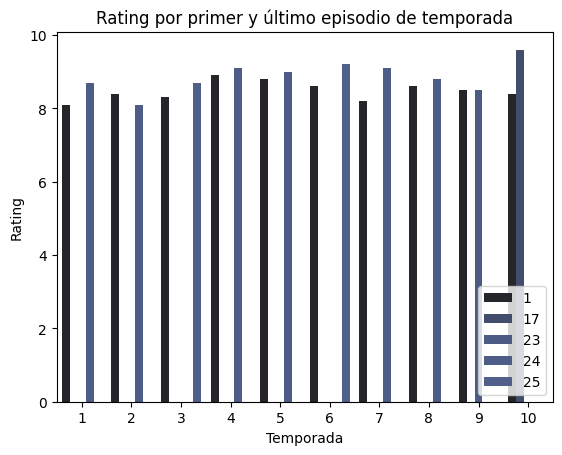

In [173]:
sns.barplot(data=df_h2, x="season", y="rating", hue="episode", palette="dark:#465B95")
plt.xlabel("Temporada")
plt.ylabel("Rating")
plt.title("Rating por primer y último episodio de temporada")
plt.legend(bbox_to_anchor=[1,0], loc="lower right");

H3

In [49]:
df_friends.groupby("season")["rating"].sum().sort_values(ascending=False)

season
6     207.9
3     206.3
5     202.4
4     199.8
8     198.8
2     198.8
7     197.9
1     195.3
9     186.5
10    144.2
Name: rating, dtype: float64

In [50]:
df_h3 = (df_friends.groupby("season")["rating"].sum().reset_index().rename(columns={"rating":"rating_total"}))
df_h3

,season,rating_total
0,1,195.3
1,2,198.8
2,3,206.3
3,4,199.8
4,5,202.4
5,6,207.9
6,7,197.9
7,8,198.8
8,9,186.5
9,10,144.2


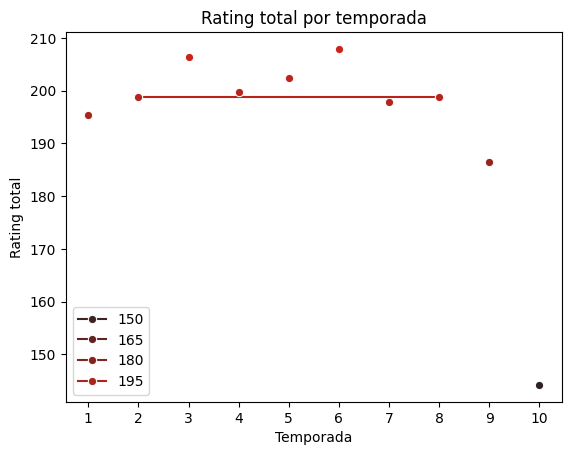

In [136]:
sns.lineplot(data=df_h3, x="season", y="rating_total", marker="o", hue="rating_total", palette="dark:#CC241B")
plt.title("Rating total por temporada")
plt.xticks(df_h3["season"])
plt.xlabel("Temporada")
plt.ylabel("Rating total")
plt.legend(loc="lower left")
plt.axis("tight");

H4

In [71]:
df_friends.groupby("director")["total_votes"].mean().sort_values(ascending=False)

director
James Burrows           7171.933333
Arlene Sanford          6859.000000
Pamela Fryman           6632.500000
Alan Myerson            6566.500000
Thomas Schlamme         6564.000000
Paul Lazarus            6372.000000
Joe Regalbuto           6174.000000
Michael Lembeck         5938.083333
Mary Kay Place          5883.000000
Ellen Gittelsohn        5863.000000
Peter Bonerz            5836.333333
Kevin Bright            5590.615385
Gail Mancuso            5477.857143
David Steinberg         5392.000000
Robby Benson            5374.333333
Shelley Jensen          5279.666667
Sam Simon               5253.000000
Steve Zuckerman         5239.000000
Andrew Tsao             5217.000000
Terry Hughes            5036.600000
Dana De Vally Piazza    4992.333333
Gary Halvorson          4846.555556
David Schwimmer         4817.700000
Todd Holland            4653.000000
Ben Weiss               4632.500000
Stephen Prime           4584.000000
Sheldon Epps            4541.333333
Roger Christiansen 

In [72]:
df_friends.groupby("director")["episode"].count()

director
Alan Myerson             2
Andrew Tsao              1
Arlene Sanford           1
Ben Weiss               10
Dana De Vally Piazza     3
David Schwimmer         10
David Steinberg          1
Ellen Gittelsohn         1
Gail Mancuso            14
Gary Halvorson          54
James Burrows           15
Joe Regalbuto            1
Kevin Bright            52
Mary Kay Place           1
Michael Lembeck         24
Pamela Fryman            2
Paul Lazarus             1
Peter Bonerz            12
Robby Benson             6
Roger Christiansen       2
Sam Simon                1
Sheldon Epps             3
Shelley Jensen           6
Stephen Prime            1
Steve Zuckerman          2
Terry Hughes             5
Thomas Schlamme          2
Todd Holland             1
Name: episode, dtype: int64

In [73]:
df_h4 = pd.merge(df_friends.groupby("director")["total_votes"].mean().reset_index(), 
                 df_friends.groupby("director")["episode"].count().reset_index()).sort_values("total_votes", ascending=False)
df_h4

,director,total_votes,episode
10,James Burrows,7171.933333,15
2,Arlene Sanford,6859.000000,1
15,Pamela Fryman,6632.500000,2
0,Alan Myerson,6566.500000,2
26,Thomas Schlamme,6564.000000,2
16,Paul Lazarus,6372.000000,1
11,Joe Regalbuto,6174.000000,1
14,Michael Lembeck,5938.083333,24
13,Mary Kay Place,5883.000000,1
7,Ellen Gittelsohn,5863.000000,1


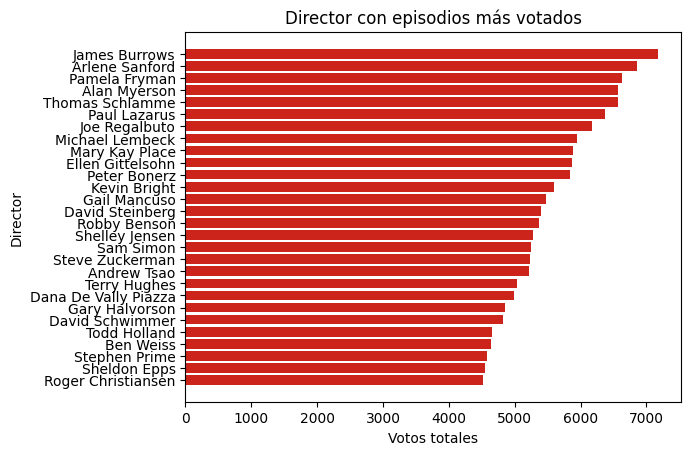

In [140]:
fig, ax = plt.subplots()
plt.barh(df_h4["director"], df_h4["total_votes"], color="#CC241B")
plt.title("Director con episodios más votados")
ax.set_xlabel("Votos totales")
ax.set_ylabel("Director")
ax.invert_yaxis();

H5

In [76]:
df_friends.head(2)

,episode_title,description,season,episode,duration_in_minutes,year,director,rating,total_votes,special_episode
0,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",1,1,22,1994,James Burrows,8.1,10266,0
1,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,1,2,22,1994,James Burrows,7.9,7986,0


In [77]:
df_friends.value_counts("special_episode")

special_episode
0    217
1     17
Name: count, dtype: int64

In [78]:
df_friends.groupby("special_episode")["rating"].mean()

special_episode
0    8.248387
1    8.705882
Name: rating, dtype: float64

In [79]:
df_h5 = (df_friends.groupby("special_episode")["rating"].mean().reset_index())
df_h5

,special_episode,rating
0,0,8.248387
1,1,8.705882


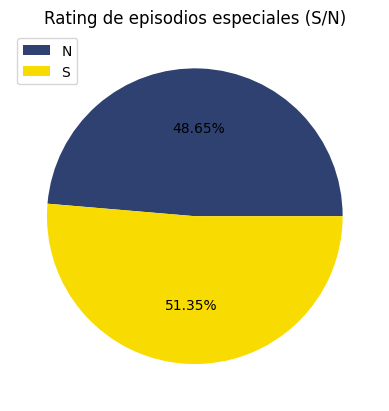

In [139]:
plt.pie(df_h5["rating"], autopct="%1.2f%%", colors=["#2E4170", "#F8DB01"])
plt.title("Rating de episodios especiales (S/N)")
plt.legend("NS", loc="upper left");